# # GRIPMAR'23 | The Sparks Foundation

### Data Science & Business Analytics Internship

#### Author- Anwesha Shit

### Task 2: Prediction using Unsupervised ML

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually
 

##### Step 1:Importing Python Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

#to ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

 ##### Step 2:Importing data-set

In [2]:
data = pd.read_csv("iris.csv")
print("Importing data successfully")

Importing data successfully


In [3]:
data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### Step-3: Exploring about data-set

In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Step-4: Feature extraction

In [7]:
iris = pd.DataFrame(data)
iris_data = iris.drop(columns=['Species','Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Step-5 Finding optimal no. of  Clusters using Elbow Method

#### Brief about Elbow Method

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [8]:
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_data)
    within_cluster_sum_of_square.append(km.inertia_)

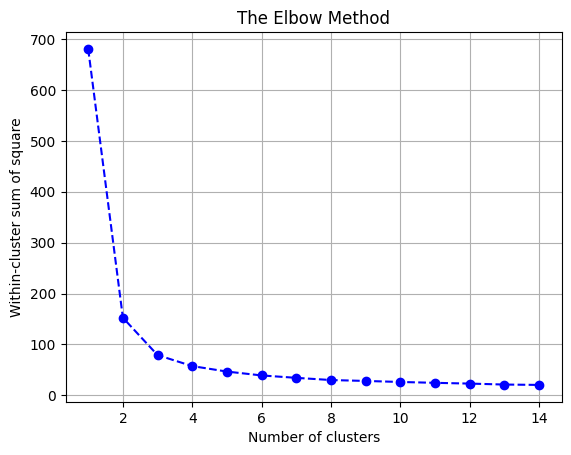

In [9]:
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()

We can clearly see why it is called 'The Elbow Method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum  of square(WCSS) doesn't decrease significantly with every iteration.

from this we choose the number of cluster "3".

##### Step-6: Applying K means clustering on the data 

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_data)

##### Step-7: Visualising the clusters 

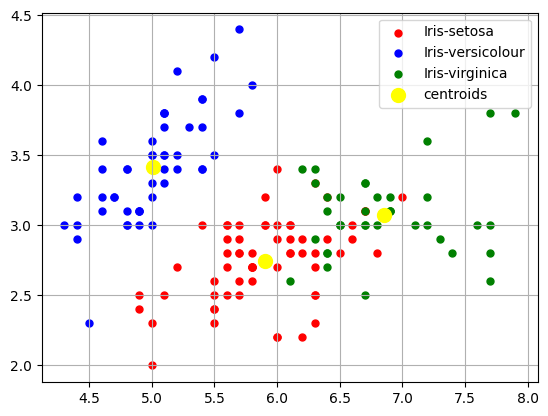

In [11]:
x = iris_data.iloc[:, [0,1,2,3]].values
plt.scatter(x[predictions == 0,0], x[predictions == 0,1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1,0], x[predictions == 1,1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2,0], x[predictions == 2,1], s = 25, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'centroids')
plt.legend()
plt.grid()